In [1]:
from __future__ import division, print_function, unicode_literals

import numpy as np
import os 

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

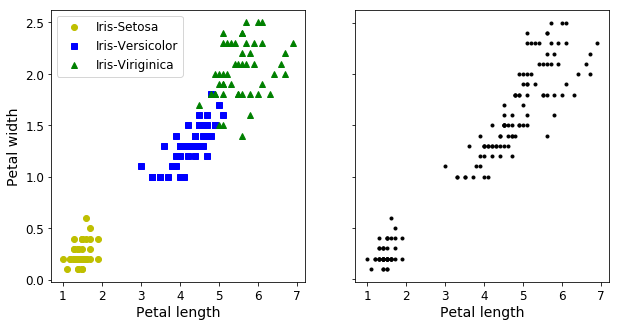

In [4]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.plot(X[y == 0, 2], X[ y == 0, 3], "yo",label="Iris-Setosa")
plt.plot(X[y == 1, 2], X[ y == 1, 3], "bs",label="Iris-Versicolor")
plt.plot(X[y == 2, 2], X[ y == 2, 3],"g^",label="Iris-Viriginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(fontsize=12)


plt.subplot(122)
plt.scatter(X[:, 2],X[:, 3],c="k",marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

In [5]:
from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)
mapping = np.array([2, 0, 1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

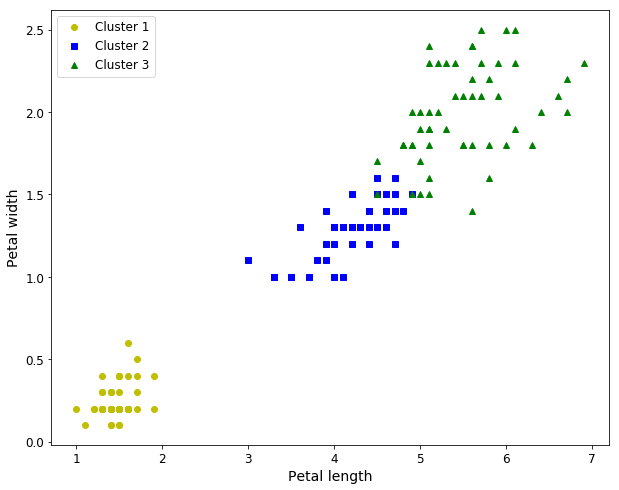

In [6]:
plt.figure(figsize=(10,8))
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo",label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs",label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^",label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [7]:
np.sum(y_pred==y)

145

In [8]:
np.sum(y_pred==y)/len(y_pred)

0.9666666666666667

In [9]:
from sklearn.datasets import make_blobs

In [10]:
blob_centers = np.array(
[[0.2, 2.3],
 [-1.5, 2.3],
 [-2.8, 1.8],
 [-2.8, 2.8],
 [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=7)

In [12]:
def plot_clusters(X,y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$",fontsize=14)
    plt.ylabel("$x_2$",fontsize=14,rotation=0)

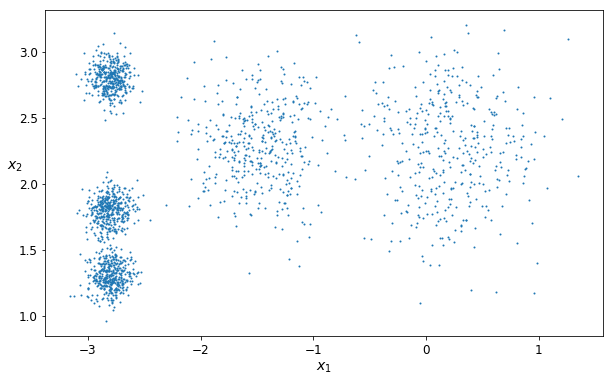

In [13]:
plt.figure(figsize=(10,6))
plot_clusters(X)
plt.show()

In [14]:
from sklearn.cluster import KMeans

In [15]:
k = 5 
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)

In [16]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [17]:
y_pred is kmeans.labels_

True

In [18]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [19]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

In [20]:
X_new = np.array([[0, 2],[3, 2], [-3, 3],[-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [21]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

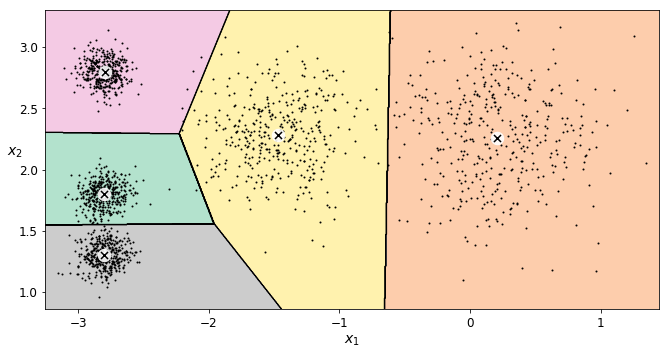

In [22]:
plt.figure(figsize=(11,5.5))
plot_decision_boundaries(kmeans, X)
plt.show()

In [23]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [24]:
np.linalg.norm(np.tile(X_new,(1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_,axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [25]:
kmeans_iter1 = KMeans(n_clusters=5, init="random",n_init=1,algorithm="full",max_iter=1,random_state=1)
kmeans_iter2 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random",n_init=1,algorithm="full",max_iter=3, random_state=1)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=3, n_clusters=5,
    n_init=1, n_jobs=None, precompute_distances='auto', random_state=1,
    tol=0.0001, verbose=0)

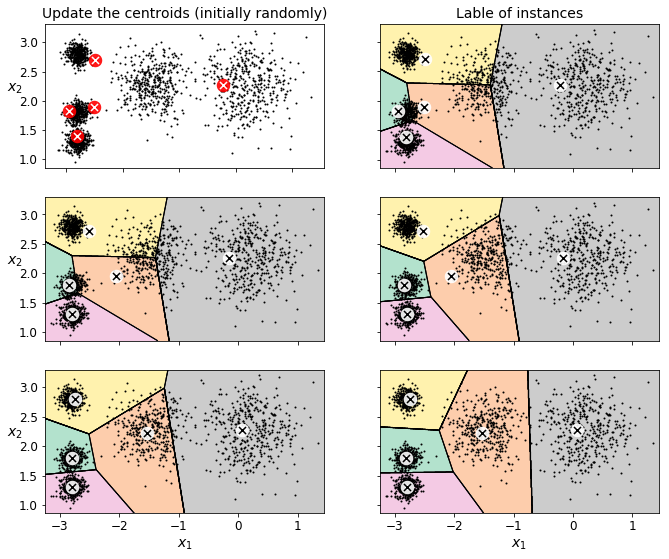

In [26]:
plt.figure(figsize=(11,9))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_,circle_color="r",cross_color='w')
plt.ylabel("$x_2$",fontsize=14,rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False,show_ylabels=False)
plt.title("Lable of instances",fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False,show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X,show_xlabels=False,show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

In [27]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)
                   
    plt.figure(figsize=(10, 3.2))
    
    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1,fontsize=14)
    
    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)            
    if title2:
        plt.title(title2,fontsize=14)

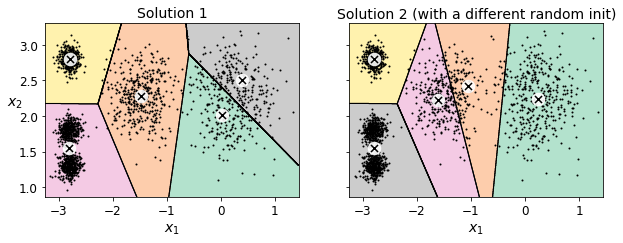

In [28]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=11)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=19)

plot_clusterer_comparison(kmeans_rnd_init1,kmeans_rnd_init2, X, "Solution 1", "Solution 2 (with a different random init)")

In [29]:
kmeans.inertia_

211.5985372581684

In [30]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816856

In [31]:
kmeans.score(X)

-211.59853725816856

In [32]:
kmeans_rnd_init1.inertia_

223.29108572819035

In [33]:
kmeans_rnd_init2.inertia_

237.46249169442845

In [34]:
kmeans_rnd_10_inits = KMeans(n_clusters=5,init="random",n_init=10,algorithm="full",random_state=11)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', copy_x=True, init='random', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=11, tol=0.0001, verbose=0)

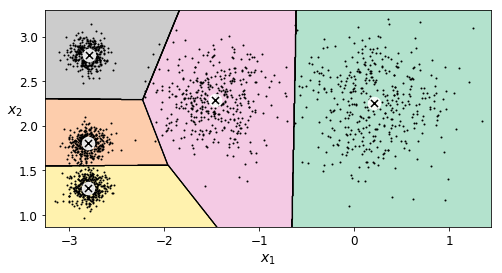

In [35]:
plt.figure(figsize=(8,4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [36]:
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
good_init = np.array([[-3, 3],[-3, 2], [3, 1], [-1, 2],[0, 2]])
kmeans = KMeans(n_clusters=5,init=good_init,n_init=1,random_state=42)
kmeans.fit(X)
kmeans.inertia_

223.2910857281904

In [38]:
%timeit -n 50 KMeans(algorithm="elkan").fit(X)

92.2 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [39]:
%timeit -n 50 KMeans(algorithm="full").fit(X)

102 ms ± 8.9 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [40]:
from sklearn.cluster import MiniBatchKMeans

In [41]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [42]:
minibatch_kmeans.inertia_

106.568950722496

In [43]:
filename = "my_mnist.data"
m, n = 50000, 28*28
X_mm = np.memmap(filename,dtype="float32",mode="readonly",shape=(m,n))

In [44]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10,random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(batch_size=10, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=10,
        n_init=3, random_state=42, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [45]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size,replace=False)]

In [46]:
np.random.seed(42)

In [47]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500 
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)
    
    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_
            
    if(best_kmeans is None or minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [48]:
best_kmeans.score(X)

-211.70999744411483

In [49]:
%timeit KMeans(n_clusters=5).fit(X)

49.3 ms ± 4.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [50]:
%time MiniBatchKMeans(n_clusters=5).fit(X)

Wall time: 26.9 ms


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=5,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [51]:
from timeit import timeit

In [52]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

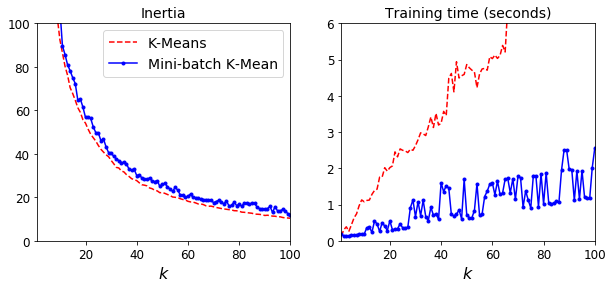

In [55]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1,101),inertias[:,0],"r--",label="K-Means")
plt.plot(range(1,101),inertias[:,1],"b.-",label="Mini-batch K-Mean")
plt.xlabel("$k$",fontsize=16)
plt.title("Inertia",fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1,101),times[:,0],"r--",label="K-Means")
plt.plot(range(1,101),times[:,1],"b.-",label="Mini-batch K-Mean")
plt.xlabel("$k$",fontsize=16)
plt.title("Training time (seconds)",fontsize=14)
plt.axis([1,100,0,6])

plt.show()

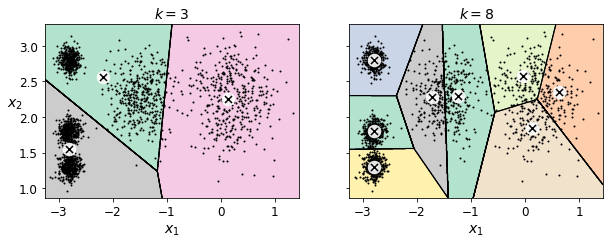

In [56]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$","$k=8$")
plt.show()

In [57]:
kmeans_k3.inertia_

653.2167190021553

In [58]:
kmeans_k8.inertia_

119.11983416102879

In [59]:
kmeans_per_k = [KMeans(n_clusters=k,random_state=42).fit(X)
               for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

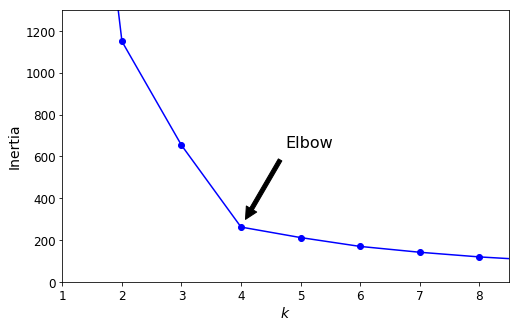

In [64]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.annotate('Elbow',
            xy=(4,inertias[3]),
            xytext=(0.55,0.55),
            textcoords='figure fraction',
            fontsize=16,
            arrowprops=dict(facecolor='black',shrink=0.1)
            )
plt.axis([1, 8.5,0,1300])
plt.show()

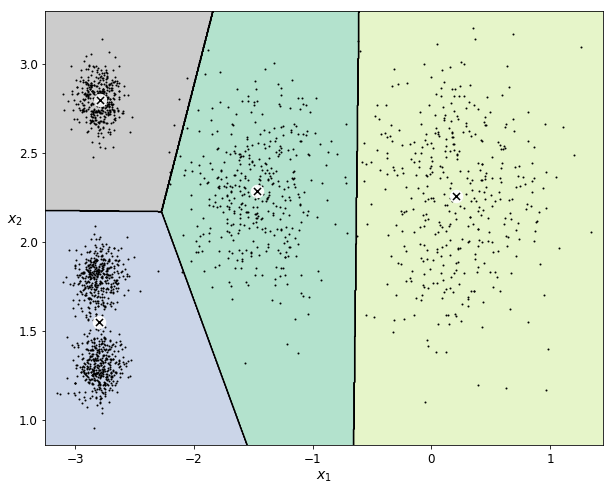

In [63]:
plt.figure(figsize=(10,8))
plot_decision_boundaries(kmeans_per_k[4-1],X)
plt.show()

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
silhouette_score(X, kmeans.labels_)

0.34507909442492657

In [67]:
silhouette_score = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

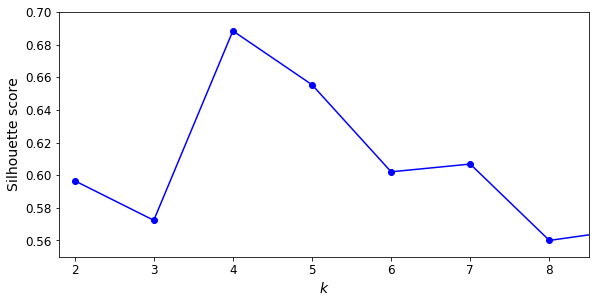

In [74]:
plt.figure(figsize=(9.5,4.5))
plt.plot(range(2,10),silhouette_score,"bo-")
plt.xlabel("$k$",fontsize=14)
plt.ylabel("Silhouette score",fontsize=14)
plt.axis([1.8,8.5,0.55,0.7])
plt.show()

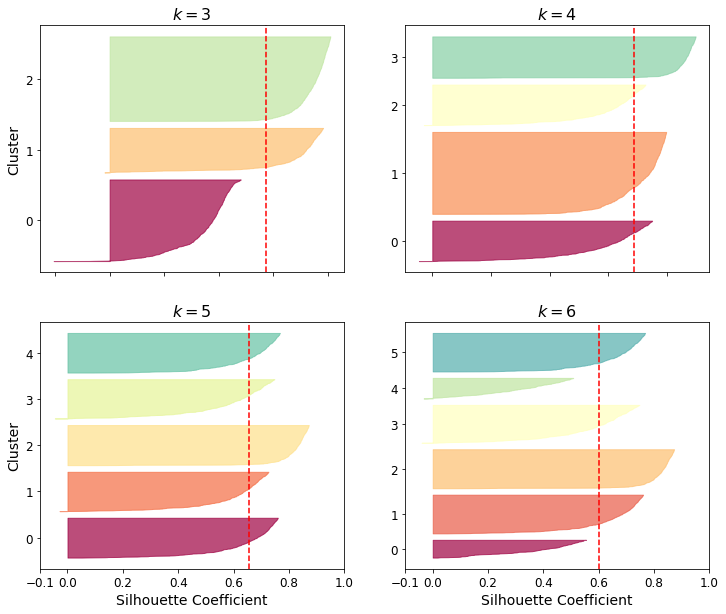

In [77]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(12,10))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k-2)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)
    
    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.Spectral(i/k)
        plt.fill_betweenx(np.arange(pos,pos+ len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color,alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel("Cluster")
        
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_score[k-2],color="red",linestyle="--")
    plt.title("$k={}$".format(k),fontsize=16)
    
plt.show()

In [81]:
X1, y1 = make_blobs(n_samples=1000, centers=((-4,4),(0,0)),random_state=42)
X1 = X1.dot(np.array([[0.374,0.95], [0.732,0.598]]))
X2, y2 = make_blobs(n_samples=250,centers=1,random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

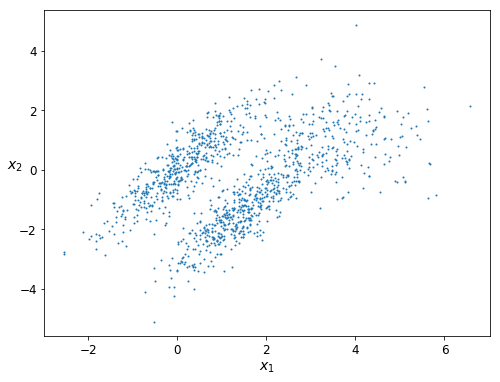

In [83]:
plt.figure(figsize=(8,6))
plot_clusters(X)

In [85]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0],[4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

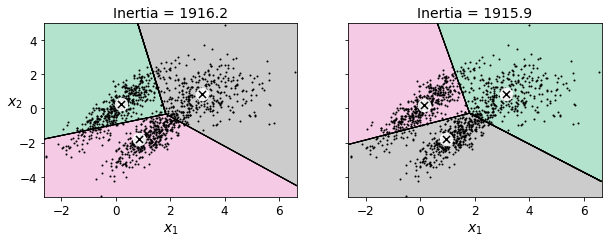

In [89]:
plt.figure(figsize=(10,3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)


plt.show()

In [100]:
from matplotlib.image import imread
image = imread(os.path.join("images/","unsupervised_learning/","ladybug.png"))
image.shape

(533, 800, 3)

In [101]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters=8,random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [104]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters,random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

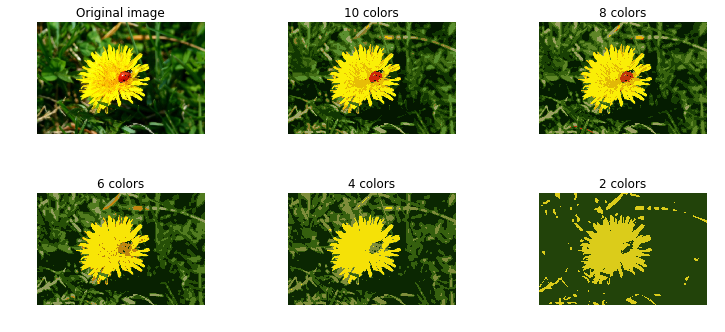

In [107]:
plt.figure(figsize=(12,6))
plt.subplots_adjust(wspace=0.5, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')
    
plt.show()

In [108]:
from sklearn.datasets import load_digits

In [109]:
X_digits, y_digits = load_digits(return_X_y=True)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_digits,y_digits,random_state=42)

In [112]:
from sklearn.linear_model import LogisticRegression

In [116]:
log_reg = LogisticRegression(multi_class="ovr",solver="liblinear",random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [117]:
log_reg.score(X_test,y_test)

0.9666666666666667

In [118]:
from sklearn.pipeline import Pipeline

In [119]:
pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=50,random_state=42)),
    ("log_reg",LogisticRegression(multi_class='ovr',solver="liblinear",random_state=42)),
])
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))])

In [120]:
pipeline.score(X_test,y_test)

0.9822222222222222

In [122]:
1 - (1-0.9822222) / (1- 0.9666666)

0.4666670666658673

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3,verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=3 ............................................
[CV] ............................. kmeans__n_clusters=3, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ............................. kmeans__n_clusters=4, total=   0.0s
[CV] kmeans__n_clusters=5 ............................................
[CV] .

[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=22 ...........................................
[CV] ............................ kmeans__n_clusters=22, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=23 ...........................................
[CV] ............................ kmeans__n_clusters=23, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................
[CV] ............................ kmeans__n_clusters=24, total=   0.2s
[CV] kmeans__n_clusters=24 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=41, total=   0.3s
[CV] kmeans__n_clusters=41 ...........................................
[CV] ............................ kmeans__n_clusters=41, total=   0.3s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.3s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.3s
[CV] kmeans__n_clusters=42 ...........................................
[CV] ............................ kmeans__n_clusters=42, total=   0.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] ............................ kmeans__n_clusters=43, total=   0.3s
[CV] kmeans__n_clusters=43 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=60, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.4s
[CV] kmeans__n_clusters=61 ...........................................
[CV] ............................ kmeans__n_clusters=61, total=   0.4s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.4s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.4s
[CV] kmeans__n_clusters=62 ...........................................
[CV] ............................ kmeans__n_clusters=62, total=   0.4s
[CV] kmeans__n_clusters=63 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=80, total=   0.5s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=80 ...........................................
[CV] ............................ kmeans__n_clusters=80, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=81 ...........................................
[CV] ............................ kmeans__n_clusters=81, total=   0.6s
[CV] kmeans__n_clusters=82 ...........................................
[CV] ............................ kmeans__n_clusters=82, total=   0.6s
[CV] kmeans__n_clusters=82 ...........................................
[CV] .

[CV] ............................ kmeans__n_clusters=99, total=   0.7s
[CV] kmeans__n_clusters=99 ...........................................
[CV] ............................ kmeans__n_clusters=99, total=   0.7s


[Parallel(n_jobs=1)]: Done 294 out of 294 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=50, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, ...lty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kmeans__n_clusters': range(2, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [125]:
grid_clf.best_params_

{'kmeans__n_clusters': 90}

In [126]:
grid_clf.score(X_test, y_test)

0.9844444444444445